<a href="https://colab.research.google.com/github/a-apte/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians_2x.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

In [1]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

from scipy import stats

help(stats.bayes_mvs)

# bayes_mvs(data, alpha=0.9)

# alpha = Probability that the returned confidence interval contains the true parameter.

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [2]:
data = [6, 9, 12, 7, 8, 8, 13]
mean, var, std = stats.bayes_mvs(data, alpha = 0.95)

print(mean) # Tuple

print(mean[0]) # Accessing 1st element in the tuple

print(mean[1][0]) # Accessing tuple within a tuple

print(mean[1][1]) # Accessing tuple within a tuple


Mean(statistic=9.0, minmax=(6.612058548265569, 11.38794145173443))
9.0
6.612058548265569
11.38794145173443


In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)



In [0]:
def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  
  print("The mean = {}, the 95% confidence interval for the mean ranges from {} to {}".format(
  confidence_interval[0], confidence_interval[1], confidence_interval[2]))
  
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
#   s = "our mean lies in the interval ]{:.2}, {:.2}[".format(
#       confidence_interval[1], confidence_interval[2])
  return None

## Assignment - Code it up!

Most of the above was pure math - write Python code to reproduce the results. This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goal - apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective.

In [29]:
# Source: https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/

# 1000 fair coin flips

import numpy as np
data_coin_flips = np.random.randint(2, size=1000) # 2 = number of sides
np.mean(data_coin_flips) # Random list leads to different means 

0.506

In [25]:
# 1000 fair coin flips, 1 = head, 0 = tail

bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
np.mean(bernoulli_flips)

0.525

In [0]:
# Probability Mass Function

def bern_pmf(x, p):
    if (x == 1):
        return p # returns p for a head
    elif (x == 0):
        return 1 - p # returns 1-p for a tail
    else:
        return "Value Not in Support of Distribution"

In [32]:
# With a fair coin, the PMF will return 0.5

print(bern_pmf(1, .5))
print(bern_pmf(0, .5))

0.5
0.5


In [33]:
# Built in function pmf from stats

from scipy import stats 
print(stats.bernoulli.pmf(1, .5))
print(stats.bernoulli.pmf(0, .5))

0.5
0.5


In [34]:
# Assumng data are IID, this is the product of each individual probability

np.product(stats.bernoulli.pmf(data_coin_flips, .5))

9.332636185032189e-302

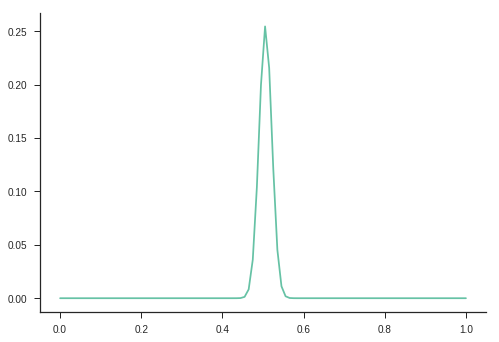

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
 
params = np.linspace(0, 1, 100)
p_x = [np.product(stats.bernoulli.pmf(data_coin_flips, p)) for p in params] 
p_x = p_x / np.sum(p_x)  # Missing step from site
plt.plot(params, p_x)
sns.despine()

# Peak at 0.5 

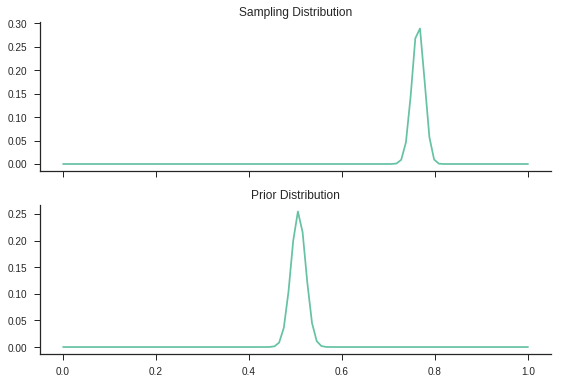

In [42]:
# Prior Distribution

biased_flips = bernoulli_flips = np.random.binomial(n=1, p=.75, size=1000)
p_biased = np.array([np.product(stats.bernoulli.pmf(biased_flips, p)) for p in params])
p_biased = p_biased / np.sum(p_biased)
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_biased)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_x)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

# The peak moved to a new center at 0.75

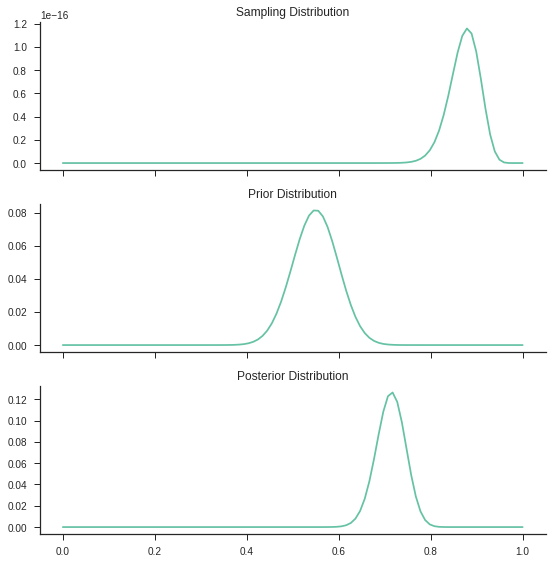

In [43]:
# Posterior Distribution

def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(stats.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(stats.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

example_post = bern_post()

**This demonstrates that the sampling distribution adjusts the probability from the prior distribution but not all the way. The posterior distribution weighs in the new sample distribution but not 100%.**

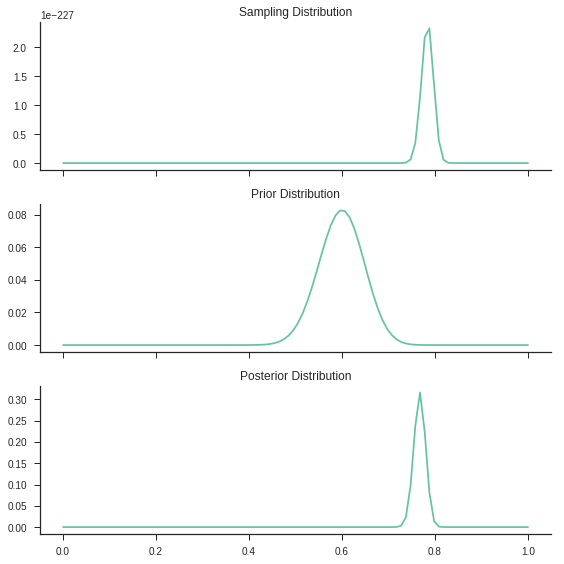

In [44]:
moredata_post = bern_post(n_sample=1000)

### Stretch -  Not sure if this is how one should do this:

In [5]:
# Bad Drivers - https://github.com/fivethirtyeight/data/tree/master/bad-drivers

import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/bad-drivers/bad-drivers.csv'

df = pd.read_csv(url)

df.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [6]:
df.rename(columns = {'Number of drivers involved in fatal collisions per billion miles' : 'no_fatal',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding' : 'pct_fatal',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired': 'pct_fatal_alcohol',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted': 'pct_fatal_nodistraction',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents' : 'pct_fatal_noprev',
                           'Car Insurance Premiums ($)' : 'ins_premiums',
                           'Losses incurred by insurance companies for collisions per insured driver ($)' : 'ins_losses'}, inplace = True)

df.head()

,State,no_fatal,pct_fatal,pct_fatal_alcohol,pct_fatal_nodistraction,pct_fatal_noprev,ins_premiums,ins_losses
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


### Frequentist confidence interval

In [7]:
confidence_interval(df['no_fatal'])

(15.79019607843137, 14.630864285214756, 16.949527871647984)

In [8]:
report_confidence_interval(confidence_interval(df['no_fatal']))

The mean = 15.79019607843137, the 95% confidence interval for the mean ranges from 14.630864285214756 to 16.949527871647984


### Bayesian confidence interval

In [9]:
mean, var, std = stats.bayes_mvs(df['no_fatal'], alpha = 0.95) # Alpha = 0.95 has the same values as the frequentist confidence interval function

mean

Mean(statistic=15.79019607843137, minmax=(14.630864285214756, 16.949527871647984))

In [10]:
stats.bayes_mvs(df['no_fatal'], alpha = 0.99)[0]

Mean(statistic=15.79019607843137, minmax=(14.244585167780395, 17.335806989082347))

In [11]:
stats.bayes_mvs(df['no_fatal'], alpha = 0.90)[0]

Mean(statistic=15.79019607843137, minmax=(14.822870811303606, 16.757521345559134))



---



In [12]:
def two_headed_prob(c, n):
  '''Determines the probability of possessing a two headed coin in a collection 
  of c coins where c-1 coins are normal given that one has received n heads and 0 tails'''
  numerator = (1/c)
  denominator = (0.5**n)*((c-1)/c) + numerator
  return (numerator / denominator)

two_headed_prob(5,5)

0.888888888888889

In [13]:
0.5**5

0.03125

### CONGRESSIONAL DATA - CONDITIONAL VOTING

In [0]:
# Functions

def t_test_2mean(col1, col2, d=0):
  mean1 = col1.mean()
  mean2 = col2.mean()
  t_stat = ((mean1 - mean2) - d) / standard_error_pooled(col1,col2)
  return t_stat

def standard_error_pooled (col1,col2):
  len1 = len(col1)
  len2 = len(col2)
  var1 = col1.var()
  var2 = col2.var()
  se = np.sqrt((var1/len1) + (var2/len2))
  return se

def degrees_freedom_pooled (col1, col2):
  len1 = len(col1)
  len2 = len(col2)
  var1 = col1.var()
  var2 = col2.var()
  df1 = var1 / len1
  df2 = var2 / len2
  df = ((df1 + df2)**2) / ((df1**2/(len1 - 1)) + (df2**2/(len2 - 1)))
  return int(df)


def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval ]{:.2}, {:.2}[".format(
      confidence_interval[1], confidence_interval[2])
  return s

In [15]:
import pandas as pd
from scipy import stats
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

headers = ['party', 'hand_infants', 'water_project', 'budget_adoption',
           'freeze_physicians', 'el_salvador', 'religion_school', 'satellite_ban',
           'contras_aid', 'mx_missile', 'immigration', 'synfuels_cutback',
           'education','superfund','crime','duty_free', 'south_africa']

df = pd.read_csv(url, names = headers) 


df.replace('?', np.nan, inplace = True) # Null values come from replacing ?
df.replace('n', 0, inplace = True)
df.replace('y', 1, inplace = True)

df.isnull().sum()

party                  0
hand_infants          12
water_project         48
budget_adoption       11
freeze_physicians     11
el_salvador           15
religion_school       11
satellite_ban         14
contras_aid           15
mx_missile            22
immigration            7
synfuels_cutback      21
education             31
superfund             25
crime                 17
duty_free             28
south_africa         104
dtype: int64

In [0]:
dem_df = df.loc[df['party'] == 'democrat']
rep_df = df.loc[df['party'] == 'republican']

In [17]:
# Uploading data into Pandas

header_new = ['hand_infants', 'water_project', 'budget_adoption',
           'freeze_physicians', 'el_salvador', 'religion_school', 'satellite_ban',
           'contras_aid', 'mx_missile', 'immigration', 'synfuels_cutback',
           'education','superfund','crime','duty_free', 'south_africa']

issues = []
t_critical = 1.96
for col in header_new:
  congress_mean = 100*df[col].mean()
  dem_mean = 100*dem_df[col].mean()
  rep_mean = 100*rep_df[col].mean()
#   diff = dem_mean - rep_mean
#   deg = degrees_freedom_pooled(dem_df[col], rep_df[col])
#   tt = t_test_2mean(dem_df[col], rep_df[col])
#   pval = 2*(1-stats.t.cdf(np.abs(tt), deg))
#   se = 100* standard_error_pooled(dem_df[col], rep_df[col])
#   lower_bound = diff - (t_critical*se)
#   upper_bound = diff + (t_critical*se)
  issues.append({'0_Issue': col, '1_Total_mean_%': congress_mean, '2_Dem_mean_%': dem_mean, '3_Rep_mean_%': rep_mean}) # List of dictionaries
  
# print("Issues that Democrats favor vs Republicans \n")

df_new = pd.DataFrame(issues)

df_new2 = df_new.sort_values('1_Total_mean_%')

df_new2 = df_new2.reset_index()
del df_new2['index']

df_new2

,0_Issue,1_Total_mean_%,2_Dem_mean_%,3_Rep_mean_%
0,synfuels_cutback,36.231884,50.588235,13.207547
1,freeze_physicians,41.745283,5.405405,98.787879
2,education,42.326733,14.457831,87.096774
3,duty_free,42.751843,63.745020,8.974359
4,hand_infants,44.208038,60.465116,18.787879
5,mx_missile,50.121065,75.806452,11.515152
6,water_project,50.387597,50.209205,50.675676
7,immigration,50.467290,47.148289,55.757576
8,el_salvador,50.476190,21.568627,95.151515
9,superfund,50.975610,28.968254,86.075949


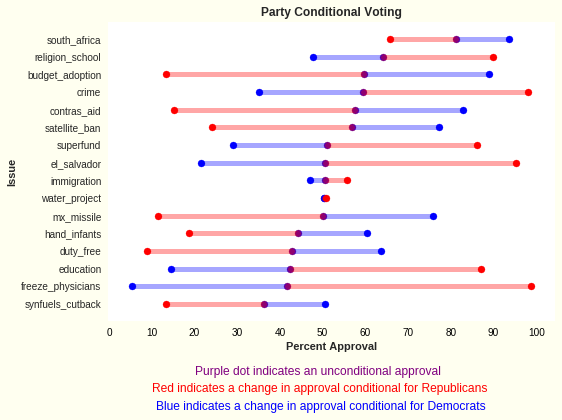

In [19]:
import matplotlib.pyplot as plt

# style.use("fivethirtyeight") 

fig, ax = plt.subplots()

y_ticks = df_new2['0_Issue'].tolist()

y = [df_new2.index,df_new2.index]
xDem = [df_new2['1_Total_mean_%'], df_new2['2_Dem_mean_%']]
xRep = [df_new2['1_Total_mean_%'], df_new2['3_Rep_mean_%']]


plt.title('Party Conditional Voting', fontweight='bold')

fig.set_facecolor("ivory")

ax.set_facecolor("white")

barlist1=ax.plot(xDem,y, linewidth=5, color='blue', alpha = 0.35)
barlist2=ax.plot(xRep,y, linewidth=5, color='red', alpha = 0.35)

x0 = df_new2['1_Total_mean_%']

plt.scatter(x0,df_new2.index, color = 'purple', marker = 'o', alpha = 1)
plt.scatter(df_new2['2_Dem_mean_%'],df_new2.index, color = 'blue', marker = 'o', alpha = 1)
plt.scatter(df_new2['3_Rep_mean_%'],df_new2.index, color = 'red', marker = 'o', alpha = 1)

ax.tick_params(axis = y, labelrotation = 0, colors = 'black', size = 24)
ax.set_yticks(df_new2.index)
ax.set_yticklabels(y_ticks)

ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80','90','100'], color = 'black')

# plt.axvline(x = 0, color = 'black', linewidth = 10, alpha = .25)

plt.text(x=20,y=-4,s="Purple dot indicates an unconditional approval", color = 'purple')
plt.text(x=10,y=-5,s="Red indicates a change in approval conditional for Republicans", color = 'red') #, weight = 'bold')
plt.text(x=11,y=-6,s="Blue indicates a change in approval conditional for Democrats", color = 'blue') #, weight = 'bold')

plt.xlabel('Percent Approval', fontweight='bold')
plt.ylabel('Issue', fontweight='bold')
  
plt.show()

**This diagram demonstrates visually how voting patterns change based on one's party affiliation. **